In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import metrics



In [2]:
datafile=pd.read_csv('F:/Python/Titanic/titanic.csv')

In [3]:
datafile.shape

(891, 12)

In [4]:
datafile.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
datafile.pop('Cabin')
datafile.pop('Name')
datafile.pop('Ticket')
datafile.pop('PassengerId')

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [7]:
datafile['Age']=datafile['Age'].fillna(datafile['Age'].mean())

In [8]:
datafile['Embarked']=datafile['Embarked'].fillna(datafile['Embarked'].mode())

<AxesSubplot:xlabel='Parch', ylabel='count'>

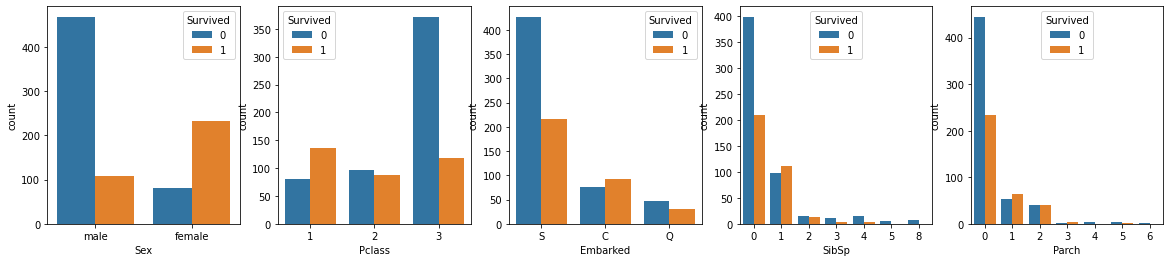

In [9]:
fig,ax=plt.subplots(nrows=1,ncols=5,figsize=(20,4))
sns.countplot(x='Sex', data=datafile, hue='Survived',ax=ax[0])
sns.countplot(x='Pclass', data=datafile, hue='Survived',ax=ax[1])
sns.countplot(x='Embarked', data=datafile,hue='Survived',ax=ax[2])
sns.countplot(x='SibSp', data=datafile,hue='Survived',ax=ax[3])
sns.countplot(x='Parch', data=datafile,hue='Survived',ax=ax[4])

<AxesSubplot:xlabel='Survived', ylabel='Age'>

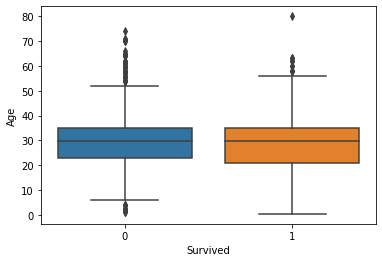

In [10]:
sns.boxplot(x='Survived', y='Age',data=datafile)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

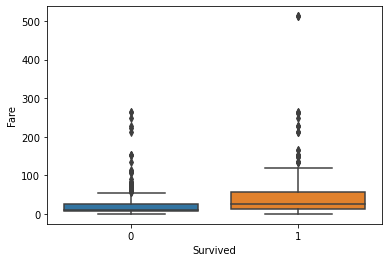

In [11]:
sns.boxplot(x='Survived', y='Fare',data=datafile)

In [12]:
datafile['Pclass'].apply(str)
datafile=pd.get_dummies(datafile, columns=['Pclass','Sex','Embarked'])

In [13]:
datafile.head(3)

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1


In [14]:
x=datafile.drop(columns=['Survived'])

In [15]:
y=datafile['Survived'].values

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=100)

In [18]:
param_grid={'max_depth': np.arange(3, 10), 'criterion':['gini','entropy']}
for cv in (range(3,6)):
 grid=GridSearchCV(DecisionTreeClassifier(), param_grid, cv=cv)
 grid.fit(x_train,y_train)
 print("score for %d fold cv:= %3.2f" %(cv,grid.score(x_test,y_test)))
 print("best fit parameters from gridSearch")
 print(grid.best_params_)

score for 3 fold cv:= 0.80
best fit parameters from gridSearch
{'criterion': 'entropy', 'max_depth': 3}
score for 4 fold cv:= 0.80
best fit parameters from gridSearch
{'criterion': 'gini', 'max_depth': 3}
score for 5 fold cv:= 0.80
best fit parameters from gridSearch
{'criterion': 'entropy', 'max_depth': 3}


In [19]:
DT_model=DecisionTreeClassifier(criterion='entropy', max_depth=3)
DT_model.fit(x_train,y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [20]:
y_pred=DT_model.predict(x_test)
print("Accuracy of Decision Tree is:{:^0.2f}".format(DT_model.score(x_test,y_test)))


Accuracy of Decision Tree is:0.80


Text(0.5, 1.0, 'Feature importance-Decision Tree')

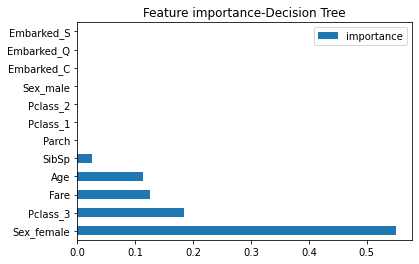

In [42]:
fi1=pd.DataFrame(DT_model.feature_importances_, index=x_train.columns,columns=['importance']).sort_values('importance',
                                                                        ascending=False)
fi1.plot(kind='bar')
plt.title('Feature importance-Decision Tree')

Text(0.5, 1.0, 'Decision Tree')

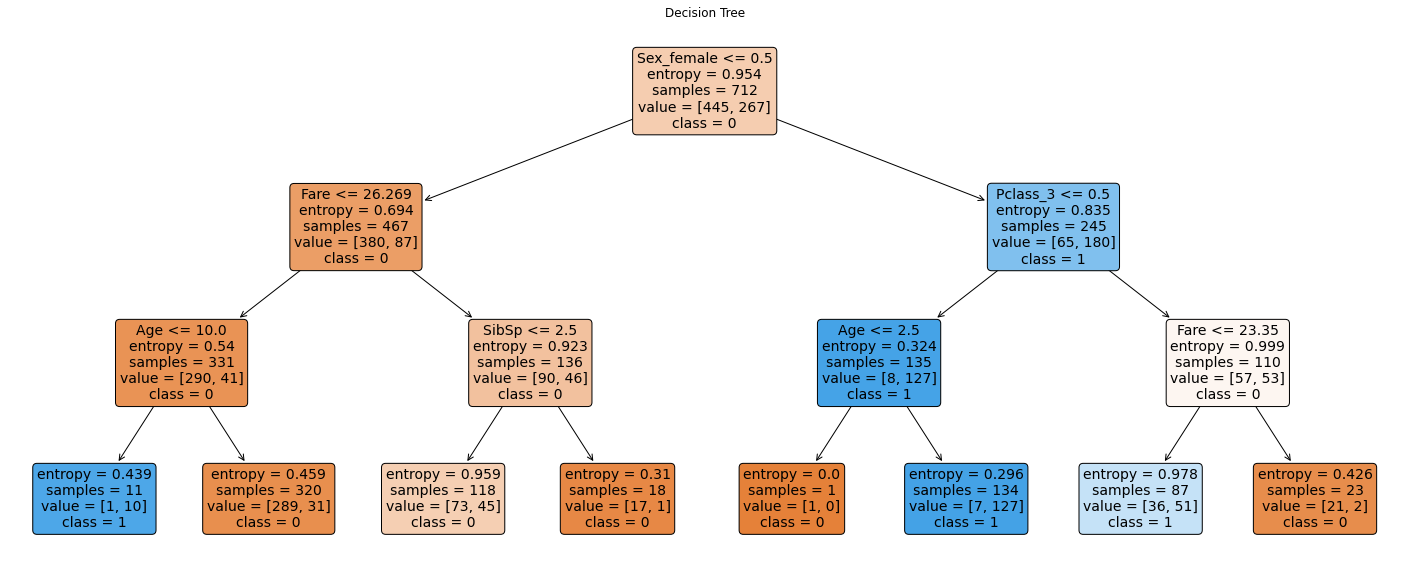

In [27]:
from sklearn import tree
plt.figure(figsize=(25,10))
plot=tree.plot_tree(DT_model,feature_names=x.columns.values.tolist(),class_names=['0','1'],filled=True,rounded=True,fontsize=14)
plt.title('Decision Tree')

In [28]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=100)
RF_model.fit(x_train,y_train)
RF_pred=RF_model.predict(x_test)
print("Accuracy of Random Forest is:{:^0.2f}".format(RF_model.score(x_test,y_test)))

Accuracy of Random Forest is:0.82


Text(0.5, 1.0, 'Feature importance-Random Forest')

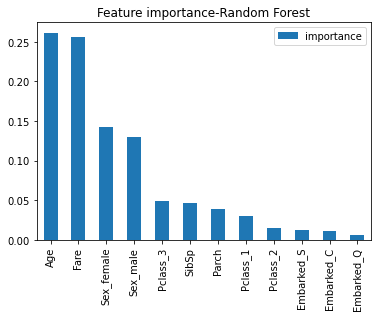

In [29]:
fi2=pd.DataFrame(RF_model.feature_importances_, index=x_train.columns,columns=['importance']).sort_values('importance',
                                                                        ascending=False)
fi2.plot(kind='bar')
plt.title('Feature importance-Random Forest')

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model=GradientBoostingClassifier()
GB_model.fit(x_train,y_train)
GB_pred=GB_model.predict(x_test)
print("Accuracy of Gradient Boost model is:{:^0.2f}".format(GB_model.score(x_test,y_test)))

Accuracy of Gradient Boost model is:0.83


Text(0.5, 1.0, 'Feature importance-Gradient Boosting')

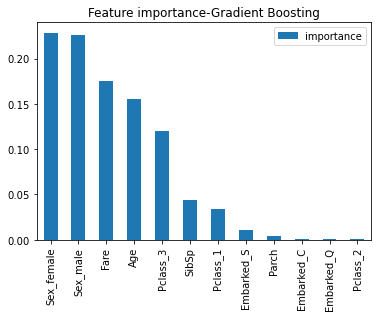

In [31]:
fi3=pd.DataFrame(GB_model.feature_importances_, index=x_train.columns,columns=['importance']).sort_values('importance',
                                                                        ascending=False)
fi3.plot(kind='bar')
plt.title('Feature importance-Gradient Boosting')

In [32]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression(solver='lbfgs', max_iter=500)
LR_model.fit(x_train,y_train)
LR_pred=LR_model.predict(x_test)
print("Accuracy of Logistic Regression model is:{:^0.2f}".format(LR_model.score(x_test,y_test)))

Accuracy of Logistic Regression model is:0.80


In [228]:
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
X2 = sm.add_constant(x_train) 
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     46.71
Date:                Sat, 03 Oct 2020   Prob (F-statistic):           3.11e-71
Time:                        02:01:00   Log-Likelihood:                -311.99
No. Observations:                 712   AIC:                             646.0
Df Residuals:                     701   BIC:                             696.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4713      0.150      3.148      0.0

<AxesSubplot:title={'center':'Feature Importance-Gradient Boosting'}>

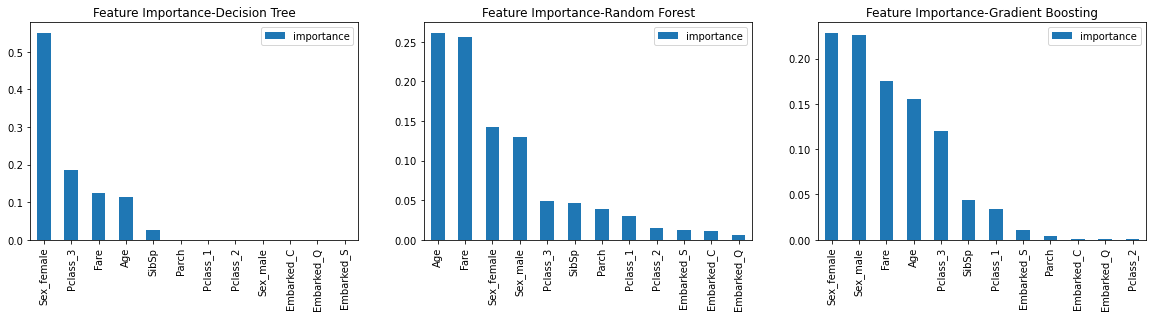

In [46]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,4))
fi1.plot(kind='bar',title='Feature Importance-Decision Tree',ax=ax[0])
fi2.plot(kind='bar',title='Feature Importance-Random Forest',ax=ax[1])
fi3.plot(kind='bar',title='Feature Importance-Gradient Boosting',ax=ax[2])


In [37]:
NN =MLPClassifier(hidden_layer_sizes=(300,200,50),solver='sgd',activation='relu',learning_rate_init=0.01, max_iter=5000)
NN.fit(x_train,y_train)
NN.predict(x_test)
Score=NN.score(x_test,y_test)*100
print("Accuracy of Neural Network Classifier Model is: {:^0.2f}% ".format(Score))

Accuracy of Neural Network Classifier Model is: 73.74% 
